In [347]:
# Librerías
import collections
import matplotlib.pyplot
import numpy
import pandas
import seaborn

In [385]:
# Carga de datos
CRIMES=pandas.read_csv('./Induction_Exercise/crimes_dataset.csv',sep=';')
CRIMES.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Location
0,I182070304,1107,Fraud,905,01/11/2017 0:00,2017,11,Wednesday,0,Part Two,"(42.33926764, -71.07208833)"
1,I182070115,3114,Investigate Property,793,11/10/2017 17:43,2017,10,Wednesday,17,Part Three,"(42.34650102, -71.13612792)"
2,I182069920,3201,Property Lost,287,31/08/2017 12:08,2017,8,Thursday,12,Part Three,"(42.33192532, -71.08411222)"
3,I182069657,1102,Fraud,774,27/06/2017 7:00,2017,6,Tuesday,7,Part Two,"(42.33848236, -71.15288978)"
4,I182069334,3201,Property Lost,420,08/12/2017 22:00,2017,12,Friday,22,Part Three,"(42.27959103, -71.08132258)"


In [349]:
# ANÁLISIS DESCRIPTIVO

# Número de observaciones
len(CRIMES)

200000

In [350]:
# Comprobación de valores nulos
for i in sorted(CRIMES):
    print(i,sum(pandas.isna(CRIMES[i])))
# Únicamente UCR_PART tiene valores nulos (73)

# Creación de un dataset alternativo únicamente con las observaciones que tiene valores nulos para "UCR_PART"
NAN_CRIMES=CRIMES[pandas.isna(CRIMES["UCR_PART"])]
NAN_CRIMES[['OFFENSE_CODE_GROUP', 'REPORTING_AREA', 'OCCURRED_ON_DATE','DAY_OF_WEEK']].describe()

DAY_OF_WEEK 0
HOUR 0
INCIDENT_NUMBER 0
Location 0
MONTH 0
OCCURRED_ON_DATE 0
OFFENSE_CODE 0
OFFENSE_CODE_GROUP 0
REPORTING_AREA 0
UCR_PART 73
YEAR 0


,OFFENSE_CODE_GROUP,REPORTING_AREA,OCCURRED_ON_DATE,DAY_OF_WEEK
count,73,73,73,73
unique,4,67,73,7
top,HOME INVASION,519,04/01/2017 12:58,Sunday
freq,61,2,1,14


In [351]:
# ANÁLISIS DESCRIPTIVO DE LAS VARIABLES CONTINUAS (no continuas, sólo numéricas en realidad)
CRIMES[['YEAR', 'MONTH', 'HOUR']].describe()


# ANÁLISIS DESCRIPTIVO DE LAS VARIABLES CATEGÓRICAS
CRIMES[['OFFENSE_CODE_GROUP', 'REPORTING_AREA', 'OCCURRED_ON_DATE','DAY_OF_WEEK','UCR_PART']].describe()

# Número de categorías en cada variable categórica
for i in ['OFFENSE_CODE','OFFENSE_CODE_GROUP', 'REPORTING_AREA', 'OCCURRED_ON_DATE','DAY_OF_WEEK','UCR_PART']:
    print(i,len(set(CRIMES[i])))
# UCR_PART cuenta como categoría los nan

# Volumen de observaciones en cada categoría de OFFENSE_CODE_GROUP
CRIMES['OFFENSE_CODE_GROUP'].value_counts()

OFFENSE_CODE 207
OFFENSE_CODE_GROUP 67
REPORTING_AREA 878
OCCURRED_ON_DATE 146598
DAY_OF_WEEK 7
UCR_PART 5


Motor Vehicle Accident Response              23583
Larceny                                      15709
Medical Assistance                           14795
Investigate Person                           12421
Other                                        10861
                                             ...  
Gambling                                         6
INVESTIGATE PERSON                               3
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Biological Threat                                2
Burglary - No Property Taken                     1
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

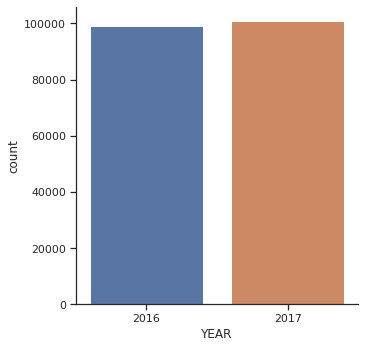

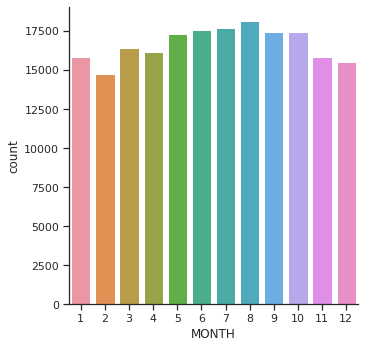

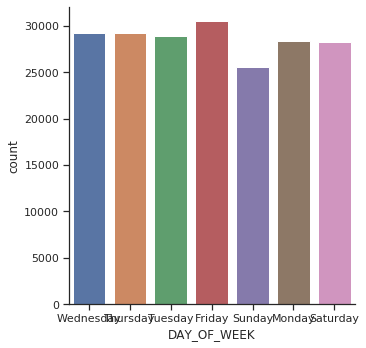

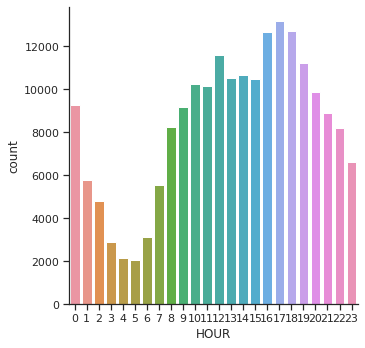

In [352]:
# GRÁFICOS DE LAS VARIABLES CONTINUAS

# Distribución de delitos a lo largo de los años
seaborn.catplot(x="YEAR",kind="count", data=CRIMES)
# Distribución de delitos a lo largo de los meses
seaborn.catplot(x="MONTH", kind="count", data=CRIMES)
# Distribución de delitos a lo largo de la semana
seaborn.catplot(x="DAY_OF_WEEK", kind="count", data=CRIMES)
# Distribución de delitos a lo largo del día
seaborn.catplot(x="HOUR", kind="count", data=CRIMES)
fig.tight_layout()

In [353]:
# Distintos tipos de delitos
sorted(Counter(CRIMES.OFFENSE_CODE_GROUP).keys())

['Aggravated Assault',
 'Aircraft',
 'Arson',
 'Assembly or Gathering Violations',
 'Auto Theft',
 'Auto Theft Recovery',
 'Ballistics',
 'Biological Threat',
 'Bomb Hoax',
 'Burglary - No Property Taken',
 'Commercial Burglary',
 'Confidence Games',
 'Counterfeiting',
 'Criminal Harassment',
 'Disorderly Conduct',
 'Drug Violation',
 'Embezzlement',
 'Evading Fare',
 'Explosives',
 'Fire Related Reports',
 'Firearm Discovery',
 'Firearm Violations',
 'Fraud',
 'Gambling',
 'HOME INVASION',
 'HUMAN TRAFFICKING',
 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',
 'Harassment',
 'Harbor Related Incidents',
 'Homicide',
 'INVESTIGATE PERSON',
 'Investigate Person',
 'Investigate Property',
 'Landlord/Tenant Disputes',
 'Larceny',
 'Larceny From Motor Vehicle',
 'License Plate Related Incidents',
 'License Violation',
 'Liquor Violation',
 'Manslaughter',
 'Medical Assistance',
 'Missing Person Located',
 'Missing Person Reported',
 'Motor Vehicle Accident Response',
 'Offenses Against Child /

In [354]:
# TOP 10 delitos más habituales
CRIMES['OFFENSE_CODE_GROUP'].value_counts().nlargest(10)

Motor Vehicle Accident Response    23583
Larceny                            15709
Medical Assistance                 14795
Investigate Person                 12421
Other                              10861
Drug Violation                     10043
Vandalism                           9900
Simple Assault                      9636
Verbal Disputes                     8535
Investigate Property                7326
Name: OFFENSE_CODE_GROUP, dtype: int64

In [355]:
# Los 5 delitos más habituales son: Motor Vehicle Accident Response, Larceny, Medical Assistance, Investigate Person y 
# Drug Violation (sin contar Other)

# Los delitos más graves son: Aggravated Assault,Aircraft, Biological Threat, Explosives, HUMAN TRAFFICKING, 
# HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE, Homicide, Manslaughter y Offenses Against Child / Family

In [386]:
# Creación de dos datasets alternativos, uno con los delitos más comunes y otro con los delitos más graves
COMMON_CRIMES=CRIMES[CRIMES["OFFENSE_CODE_GROUP"].isin(["Motor Vehicle Accident Response","Larceny","Medical Assistance","Investigate Person",
                                                          "Drug Violation"])]

SERIOUS_CRIMES=CRIMES[CRIMES["OFFENSE_CODE_GROUP"].isin(["Aggravated Assault","Aircraft","Biological Threat","Explosives","HUMAN TRAFFICKING",
                                                         "HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE","Homicide","Manslaughter","Offenses Against Child / Family"])]

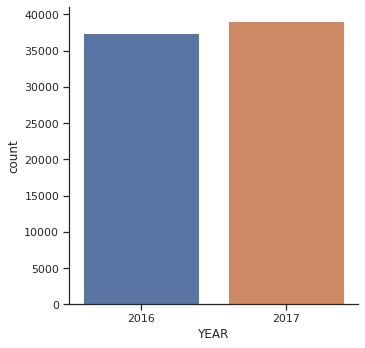

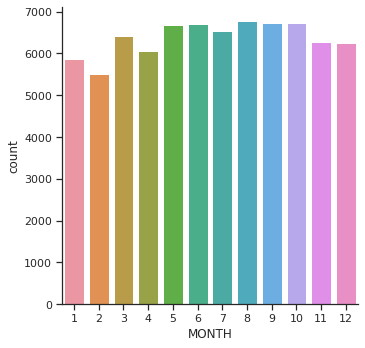

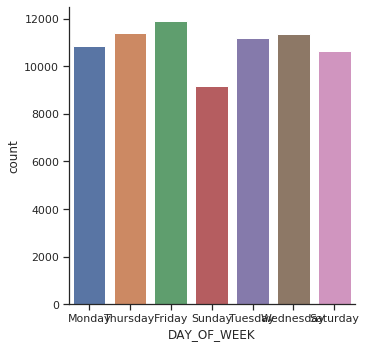

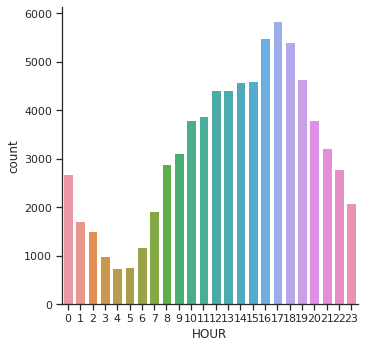

In [387]:
# GRÁFICOS DE LAS VARIABLES CONTINUAS PARA LOS DELITOS COMUNES

# Distribución de delitos a lo largo de los años
seaborn.catplot(x="YEAR",kind="count", data=COMMON_CRIMES)
# Distribución de delitos a lo largo de los meses
seaborn.catplot(x="MONTH", kind="count", data=COMMON_CRIMES)
# Distribución de delitos a lo largo de la semana
seaborn.catplot(x="DAY_OF_WEEK", kind="count", data=COMMON_CRIMES)
# Distribución de delitos a lo largo del día
seaborn.catplot(x="HOUR", kind="count", data=COMMON_CRIMES)
fig.tight_layout()

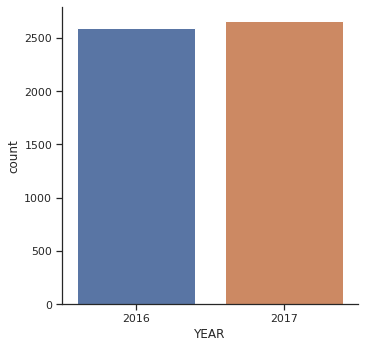

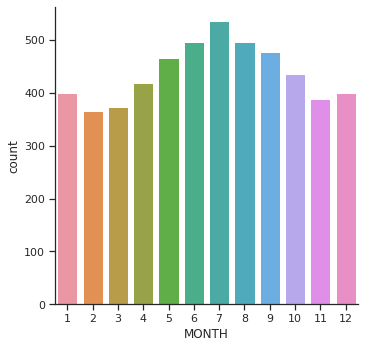

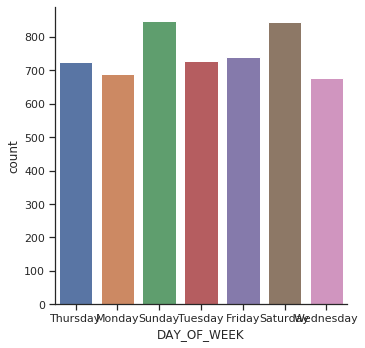

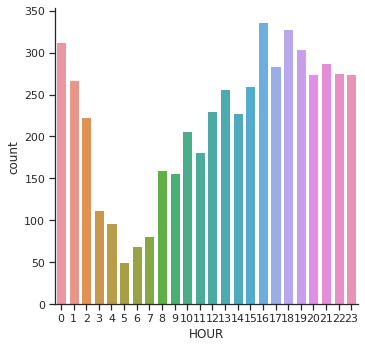

In [388]:
# GRÁFICOS DE LAS VARIABLES CONTINUAS PARA LOS DELITOS GRAVES

# Distribución de delitos a lo largo de los años
seaborn.catplot(x="YEAR",kind="count", data=SERIOUS_CRIMES)
# Distribución de delitos a lo largo de los meses
seaborn.catplot(x="MONTH", kind="count", data=SERIOUS_CRIMES)
# Distribución de delitos a lo largo de la semana
seaborn.catplot(x="DAY_OF_WEEK", kind="count", data=SERIOUS_CRIMES)
# Distribución de delitos a lo largo del día
seaborn.catplot(x="HOUR", kind="count", data=SERIOUS_CRIMES)
fig.tight_layout()

In [401]:
SERIOUS_CRIMES.groupby(['OFFENSE_CODE_GROUP'],as_index=False).mean()

,OFFENSE_CODE_GROUP,OFFENSE_CODE,YEAR,MONTH,HOUR
0,Aggravated Assault,416.665339,2016.504089,6.605158,13.018872
1,Aircraft,3122.000000,2016.846154,5.884615,14.269231
2,Biological Threat,2672.000000,2017.000000,10.500000,11.500000
3,Explosives,2906.571429,2016.500000,6.357143,9.357143
4,HUMAN TRAFFICKING,1610.000000,2016.714286,6.714286,12.285714
5,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,1620.000000,2016.500000,6.000000,13.000000
6,Homicide,111.000000,2016.534653,7.287129,13.029703
7,Manslaughter,120.375000,2016.375000,4.750000,9.000000
8,Offenses Against Child / Family,2063.584615,2016.495385,6.403077,13.123077


In [ ]:
# Análisis temporal (buscar estacionalidad)

In [363]:
# Representación de delitos en coordenadas (buscar zonas calientes)